<a href="https://colab.research.google.com/github/yotam-biu/ps11/blob/main/simulations_exserise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spread Fire Simulation

In [1]:
import numpy as np

# for plots:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

The spread fire model is a simulation that represents the propagation of fire across a two-dimensional grid of cells. The model considers the status of each cell, which can be either "burning" or "unburned." The simulation proceeds in discrete time steps, during which the status of each cell is updated based on certain rules.

The code for the spread fire model typically involves the following steps:

* Initializing the grid: The two-dimensional grid is created and each cell is assigned an initial status (e.g., tree - randomly, and one cell on fire).

* Updating the status of each cell: For each time step, the status of each cell is updated based on a set of rules. In general, an unburned cell may ignite if one of its neighbors is burning.

* Visualizing the grid: The updated grid is typically visualized as an image or animation, which shows the progression of the fire over time..

The spread fire model can be used to study the behavior of fires under different conditions and to evaluate strategies for fire prevention and control.

In [2]:
def initialize_forest(grid_size=30, p_tree=0.6):
    """Initialize a grid for the forest fire simulation."""
    grid = np.random.rand(grid_size, grid_size)
    grid = np.where(grid < p_tree, 1, 0)
    grid[grid_size // 2][grid_size // 2] = 2
    return grid



In [7]:
# define the rules for spreading the fire
def spread_fire(grid):
    """Update the forest grid based on fire spreading rules."""
    update_grid = grid.copy()
    grid_size = len(grid)

    for i in range(grid_size - 1):
        for j in range(grid_size - 1):
            if grid[i,j] == 1:
                neighbors = [grid[i - 1,j], grid[i + 1,j], grid[i,j - 1], grid[i,j + 1]]
                if 2 in neighbors:
                    update_grid[i,j] = 2

    return update_grid


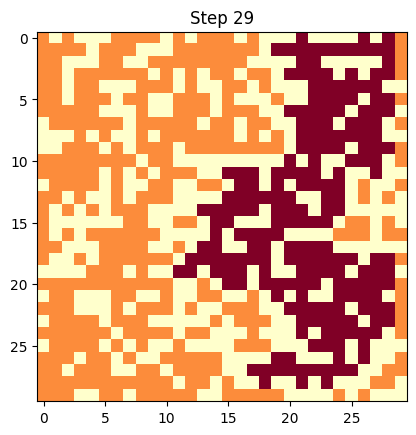

In [8]:


# Set up the grid
grid_size = 30
p_tree = 0.6  # Probability that a cell contains a tree

grid = initialize_forest(grid_size, p_tree)

# run the simulation
fig, ax = plt.subplots()
for i in range(100):
    update_grid = spread_fire(grid)
    if np.array_equal(update_grid, grid):
        break
    grid = update_grid
    ax.imshow(grid, cmap='YlOrRd', vmin=0, vmax=2)
    ax.set_title(f'Step {i}')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.01)

Please note that the cells on the right and bottom edges appear to be unexpectedly protected. Could you please update the code to account for these cells as well.